*** Model Performance (Holdout & CV) ***
                 Model  Accuracy (%)  Precision (%)  Recall (%)  F1 Score (%)  \
0        Decision Tree         90.00          96.36       92.17         94.22   
1                  KNN         91.54          94.83       95.65         95.24   
2  Logistic Regression         91.54          95.61       94.78         95.20   
3        Random Forest         90.00          96.36       92.17         94.22   
4                  SVM         90.00          93.97       94.78         94.37   
5          Naive Bayes         92.31          97.30       93.91         95.58   

   CV Accuracy (%)  
0            91.33  
1            89.21  
2            93.06  
3            93.45  
4            93.25  
5            89.98  

Best model based on F1 Score: Naive Bayes


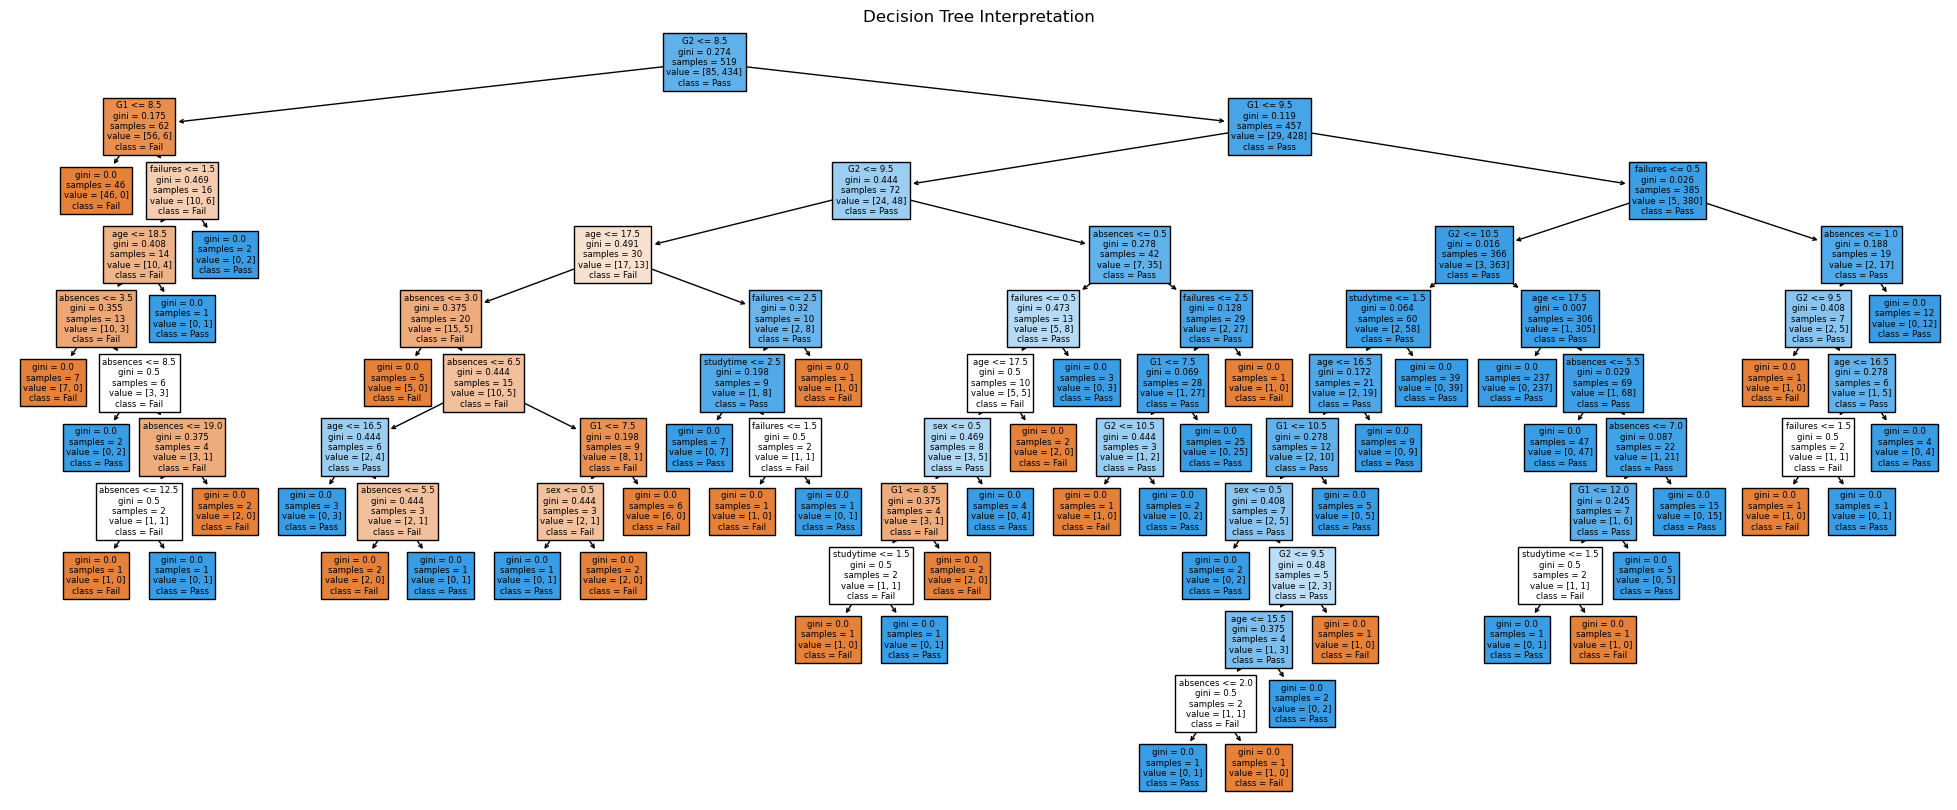


*** Input Constraints ***
sex: 'M' or 'F'
age: 15-22
studytime: 1 (<2hrs), 2 (2-5hrs), 3 (5-10hrs), 4 (>10hrs)
failures: 0-4
absences: 0-75
G1: 0-20
G2: 0-20



How many students to predict?  3



*** Enter data for Student 1 ***


Sex (M/F):  M
Age (15-22):  18
Studytime (1-4):  3
Failures (0-4):  2
Absences (0-75):  12
G1 (0-20):  15
G2 (0-20):  8



*** Enter data for Student 2 ***


Sex (M/F):  M
Age (15-22):  20
Studytime (1-4):  3
Failures (0-4):  4
Absences (0-75):  3
G1 (0-20):  10
G2 (0-20):  8



*** Enter data for Student 3 ***


Sex (M/F):  F
Age (15-22):  22
Studytime (1-4):  4
Failures (0-4):  1
Absences (0-75):  50
G1 (0-20):  20
G2 (0-20):  8



*** Prediction Results ***
Student 1: Pass
Student 2: Fail
Student 3: Pass


In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from ucimlrepo import fetch_ucirepo

# Random seed for reproducibility
RANDOM_SEED = 42

# Fetch dataset from UCI repository
student_performance = fetch_ucirepo(id=320)
df = pd.concat([student_performance.data.features, student_performance.data.targets], axis=1)

# Feature Selection
selected_features = ['sex', 'age', 'studytime', 'failures', 'absences', 'G1', 'G2']
target = 'G3'

X = df[selected_features].copy()
y = df[target].copy()

# Encode categorical 'sex' feature
le = LabelEncoder()
X.loc[:, 'sex'] = le.fit_transform(X['sex'])

# Binary target classification: 1 = Pass fir G3 ≥ 10, 0 = Fail
y = y.apply(lambda x: 1 if x >= 10 else 0)

# Train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classification models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_SEED),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=RANDOM_SEED),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_SEED),
    'SVM': SVC(random_state=RANDOM_SEED),
    'Naive Bayes': GaussianNB()
}

# Train, evaluate with cross-validation, and store results
results = []
for name, model in models.items():
    # For cross-validation performance estimate (5-fold CV)
    if name in ['KNN', 'Logistic Regression', 'SVM', 'Naive Bayes']:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred) * 100
    rec = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    cv_mean = cv_scores.mean() * 100

    results.append({
        'Model': name,
        'Accuracy (%)': round(acc, 2),
        'Precision (%)': round(prec, 2),
        'Recall (%)': round(rec, 2),
        'F1 Score (%)': round(f1, 2),
        'CV Accuracy (%)': round(cv_mean, 2)
    })

# Results DataFrame
results_df = pd.DataFrame(results)
print("*** Model Performance (Holdout & CV) ***")
print(results_df)

# Pick best model based on F1 Score, and Recall if tie
best_model_row = results_df.sort_values(by=['F1 Score (%)', 'Recall (%)'], ascending=False).iloc[0]
best_model_name = best_model_row['Model']
print(f"\nBest model based on F1 Score: {best_model_name}")

# Visualizing Decision Tree for Interpretability
if 'Decision Tree' in models:
    dt_model = models['Decision Tree']
    plt.figure(figsize=(25,10))
    plot_tree(dt_model, feature_names=selected_features, class_names=['Fail', 'Pass'], filled=True)
    plt.title("Decision Tree Interpretation")
    plt.show()

# Constraints for user inputs
print("\n*** Input Constraints ***")
print("sex: 'M' or 'F'")
print("age: 15-22")
print("studytime: 1 (<2hrs), 2 (2-5hrs), 3 (5-10hrs), 4 (>10hrs)")
print("failures: 0-4")
print("absences: 0-75")
print("G1: 0-20")
print("G2: 0-20")

# Number of students to predict
num_students = int(input("\nHow many students to predict? "))

# Collect new student data
new_students = []
for i in range(num_students):
    print(f"\n*** Enter data for Student {i+1} ***")
    sex = input("Sex (M/F): ").strip().upper()
    while sex not in ['M', 'F']:
        sex = input("Invalid. Enter 'M' or 'F': ").strip().upper()

    age = int(input("Age (15-22): "))
    while not (15 <= age <= 22):
        age = int(input("Invalid. Enter age (15-22): "))

    studytime = int(input("Studytime (1-4): "))
    while not (1 <= studytime <= 4):
        studytime = int(input("Invalid. Enter studytime (1-4): "))

    failures = int(input("Failures (0-4): "))
    while not (0 <= failures <= 4):
        failures = int(input("Invalid. Enter failures (0-4): "))

    absences = int(input("Absences (0-75): "))
    while not (0 <= absences <= 75):
        absences = int(input("Invalid. Enter absences (0-75): "))

    g1 = int(input("G1 (0-20): "))
    while not (0 <= g1 <= 20):
        g1 = int(input("Invalid. Enter G1 (0-20): "))

    g2 = int(input("G2 (0-20): "))
    while not (0 <= g2 <= 20):
        g2 = int(input("Invalid. Enter G2 (0-20): "))

    new_students.append([sex, age, studytime, failures, absences, g1, g2])

# Create DataFrame for new students
new_students_df = pd.DataFrame(new_students, columns=selected_features)

# Encode and scale new data
new_students_df['sex'] = le.transform(new_students_df['sex'])
new_students_scaled = scaler.transform(new_students_df)

# Predict using the best model
if best_model_name in ['KNN', 'Logistic Regression', 'SVM', 'Naive Bayes']:
    predictions = models[best_model_name].predict(new_students_scaled)
else:
    predictions = models[best_model_name].predict(new_students_df)

# Display predictions
print("\n*** Prediction Results ***")
for idx, pred in enumerate(predictions):
    status = "Pass" if pred == 1 else "Fail"
    print(f"Student {idx+1}: {status}")